## Практическое задание № 1. Классификация 
**Работу выполнила:**

Идрисова Лена Рустемовна, 368234

## Импорт библиотек

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

## Функция для визуализации

In [102]:
def visualize_confusion_matrix (yhat):
    from sklearn.metrics import  confusion_matrix
    confusion_matrix = confusion_matrix(test_y, yhat)
    plt.style.use('seaborn-v0_8-paper')
    plt.figure(figsize=(20, 7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="PuRd")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    tick_marks = np.arange(0.5, 6.5, 1.0)
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names, rotation=0)
    plt.show()

## Считываем набор данных

In [8]:
def read_data(path, filename):                             # считываем данные из CSV-файла
    return pd.read_csv(os.path.join(path, filename))

df = read_data('', 'train.csv')
df.head()                                                  #отображение первых нескольких строк данных.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [19]:
def load_dataset(label_dict):                               # Загружаем данные из файлов train.csv и test.csv.
    train_X = read_data('', 'train.csv').values[:,:-2]      # Преобразуем данные в массивы NumPy,
    train_y = read_data('', 'train.csv')['Activity']        # Удаляем ненужные столбцы и преобразуем целевые значения с помощью словаря `label_dict`
    train_y = train_y.map(label_dict).values
    test_X = read_data('', 'test.csv').values[:,:-2]
    test_y = read_data('', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
    
# Определяем словарь, который сопоставляет текстовые метки с числовыми значениями.
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

# k-NN

In [ ]:
model_k_neighbors = KNeighborsClassifier() #Импортируем модель                 

### Мотивация по выбору модели. 

Мотивация выбора этой модели заключается в ее простоте, интерпретируемости и высокой эффективности на небольших и средних объемах данных. Она хорошо подходит для задач классификации и регрессии, особенно в случаях, когда данные распределены неравномерно или имеют сложные границы принятия решений.

### Гиперпараметры модели 

`k` (число соседей):  Определяет количество ближайших соседей, которые учитываются для классификации нового экземпляра. Малое значение k может сделать модель чувствительной к шуму (например, к выбросам), тогда как слишком большое значение может привести к игнорированию локальных паттернов и слишком сильной обобщенности.

`Метрика расстояния`: Определяет, как вычисляется расстояние между точками. Популярные метрики включают евклидово расстояние, манхэттенское расстояние и другие. Выбор метрики может существенно повлиять на результаты классификации, особенно если данные имеют разные масштабы или формы.

`Вес соседей`: Определяет, как сильно учитываются разные соседи. Обычно можно выбрать между равными весами или взвешенными (где ближние соседи имеют больший вес). Взвешенные соседи могут улучшить результаты, особенно если есть уверенность в том, что ближние соседи более релевантны.

`Алгоритм поиска соседей`: Определяет способ поиска ближайших соседей, например, может использоваться полный перебор, kd-деревья или Ball Tree. Выбор алгоритма может повлиять на скорость вычисления, особенно при больших объемах данных.

### Обучение модели
Обучим модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [ ]:
model_k_neighbors.fit(train_X, train_y)  

KNeighborsClassifier()

### Прогнозирование



Используем обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраним в списке `yhat`.

In [12]:
yhat_k_neighbors = model_k_neighbors.predict(test_X)

### Оценка модели

In [13]:
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']  # Определяем имена целевых классов

print(classification_report(test_y, yhat_k_neighbors, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.89      0.90      0.90       471
Walking Downstairs       0.95      0.79      0.86       420
           Sitting       0.91      0.79      0.85       491
          Standing       0.83      0.93      0.88       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



### Визуализация

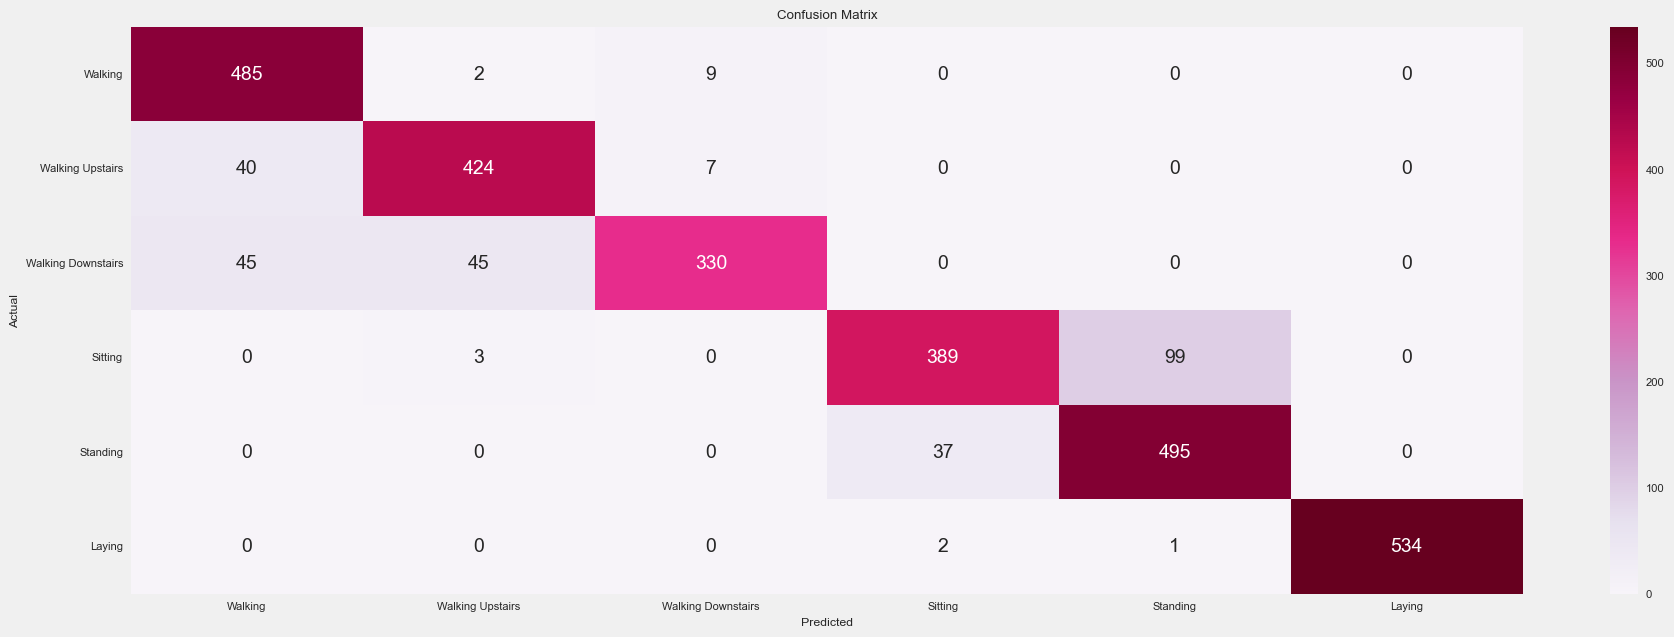

In [103]:
visualize_confusion_matrix (yhat_k_neighbors)

# Naive Bayes

In [42]:
model_Bayes = GaussianNB()  #импортируем модель

### Мотивация по выбору модели

Я выбрала модель линейной регрессии по нескольким причинам:

1. **Простота и быстрота**: Алгоритм Наивного Байеса очень прост в реализации и требует сравнительно небольших вычислительных затрат при обучении и предсказании, что делает его подходящим для больших объемов данных.

2. **Эффективность** (при малом количестве обучающих данных): Эта модель может дать хорошие результаты даже при недостатке данных, что делает ее полезной в тех случаях, когда сбор большого количества данных невозможен.

### Гиперпараметры модели 

`alpha` (параметр сглаживания): Применяется для предотвращения проблем с нулевыми вероятностями. Если модель не видела определенный признак в классе, вероятность для этого признака будет равна нулю, что плохо скажется на точности. Увеличение значения alpha приводит к более сглаженным оценкам вероятностей, что помогает улучшить обобщающую способность модели, особенно при недостаточном количестве данных.

`fit_prior`: Определяет, будет ли модель учитывать априорные вероятности классов при обучении. Если fit_prior=True, модель будет вычислять классовые вероятности из обучающих данных. Если False, используются равные вероятности для всех классов. Это может повлиять на результаты, особенно в дисбалансированных классах.

`class_prior`: Позволяет вручную задать априорные вероятности для классов. Установка значений для этого гиперпараметра может улучшить результаты, если есть предварительная информация о распределении классов.

`Выбор типа Наивного Байеса`: В зависимости от типа данных можно выбирать между различными версиями модели (Gaussian, Multinomial, Bernoulli и др.) Это определяет, как рассчитываются вероятности. Например, GaussianNB подходит для непрерывных данных, в то время как MultinomialNB работает лучше для дискретных данных и текстов.

### Обучение модели

In [43]:
model_Bayes.fit(train_X, train_y) #Обучим модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

GaussianNB()

### Прогнозирование

In [44]:
#Используем обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраним в списке `yhat`.
yhat_Bayes = model_Bayes.predict(test_X)  

### Оценка модели

In [45]:
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']  # Определяем имена целевых классов

print(classification_report(test_y, yhat_Bayes, target_names=target_names))  # Выводим отчет о классификации, который показывает точность модели на тестовых данных.


                    precision    recall  f1-score   support

           Walking       0.82      0.84      0.83       496
  Walking Upstairs       0.76      0.96      0.84       471
Walking Downstairs       0.83      0.61      0.70       420
           Sitting       0.58      0.75      0.65       491
          Standing       0.80      0.86      0.83       532
            Laying       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947



### Визуализация

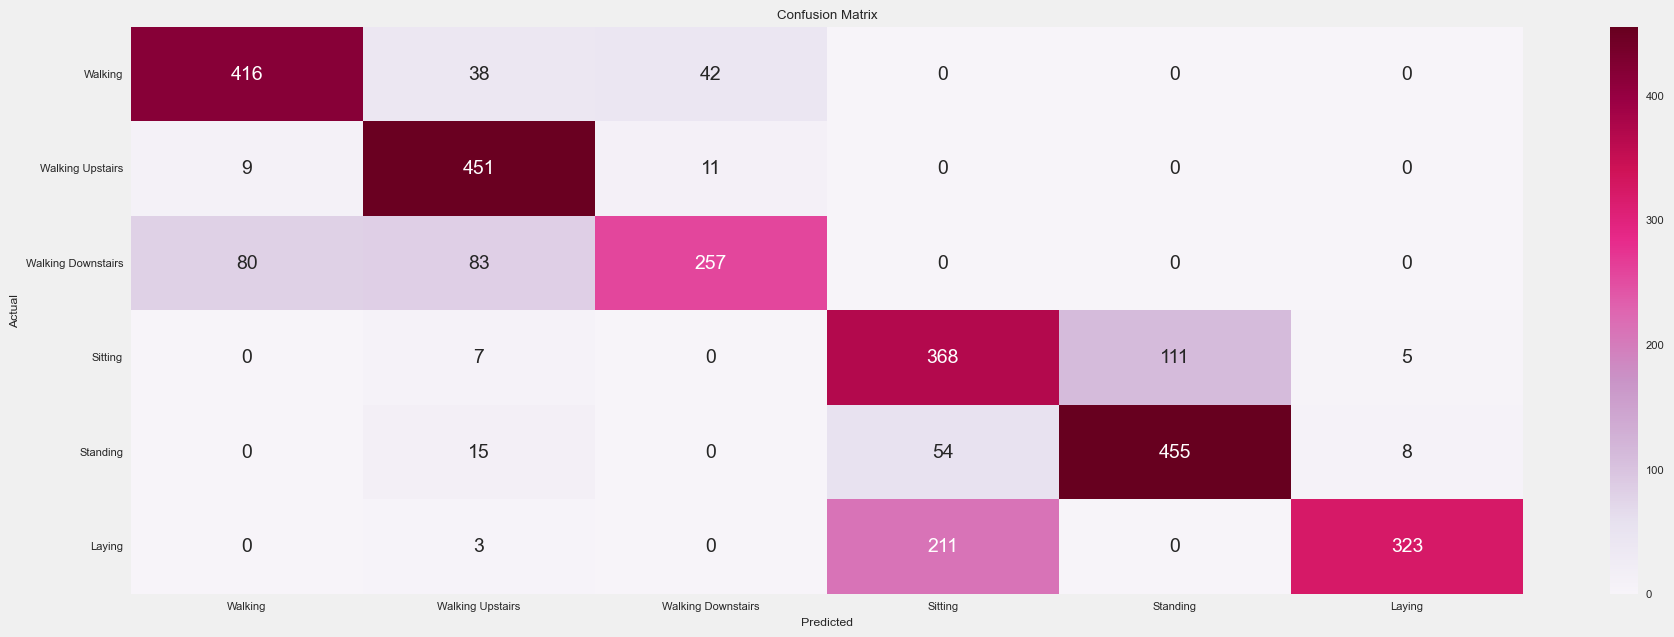

In [104]:
visualize_confusion_matrix (yhat_Bayes)

# DecisionTreeClassifier

In [ ]:
model_decision_tree = DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=10)   #Импортируем модель

### Мотивация по выбору модели

Я выбрала модель Decision Tree Classifier (дерево решений) по нескольким причинам:

1. Простота интерпретации: Деревья решений легко визуализировать и интерпретировать.

2. Непараметричность: Модель не требует предположений о распределении данных. Это полезно, когда данные не следуют нормальному распределению. 

3. Обработка категориальных данных: Деревья решений могут непосредственно работать с категориальными данными и не требуют предварительного кодирования. 

4. Хорошая производительность при небольших выборках: Деревья могут показать хорошие результаты даже при небольшом количестве данных. 

### Гиперпараметры модели 

`max_depth`: Максимальная глубина дерева. Ограничивает количество уровней, что помогает избежать переобучения. Глубокие деревья могут запоминать шум в данных, в то время как мелкие деревья могут недообучаться.

`min_samples_split`: Минимальное количество образцов, необходимых для разбиения узла. Если количество образцов в узле меньше этого значения, дальнейшее разбиение не происходит. Этот параметр также помогает контролировать переобучение.

`min_samples_leaf`: Минимальное количество образцов, которые должны оставаться в листьях. Увеличение этого значения может помочь сделать модель более устойчивой к шуму в данных.

`ax_features`: Максимальное количество признаков, которые будут рассматриваться при разбиении узла. Это помогает уменьшить коррелированность между деревьями, если использовать метод ансамблирования (например, Random Forest).

`criterion`: Критерий для оценки качества разбиения. Наиболее распространённые варианты — gini (индекс Джини) и entropy (энтропия). Эти параметры влияют на то, как модель выбирает, какие признаки использовать для разбиений.

`class_weight`: Позволяет задать веса для классов, что полезно при работе с несбалансированными данными.

### Обучение модели

In [34]:
model_decision_tree.fit(train_X, train_y)  #Обучим модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).    

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

### Прогнозирование

In [35]:
#Используем обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраним в списке `yhat`.
yhat_decision_tree = model_decision_tree.predict(test_X)  

### Оценка модели

In [36]:
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']  # Определяем имена целевых классов

print(classification_report(test_y, yhat_decision_tree, target_names=target_names))  # Выводим отчет о классификации, который показывает точность модели на тестовых данных.

                    precision    recall  f1-score   support

           Walking       0.78      0.95      0.86       496
  Walking Upstairs       0.75      0.80      0.77       471
Walking Downstairs       0.94      0.62      0.75       420
           Sitting       0.78      0.77      0.77       491
          Standing       0.79      0.80      0.79       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.83      2947
         macro avg       0.84      0.82      0.82      2947
      weighted avg       0.84      0.83      0.83      2947



### Визуализация

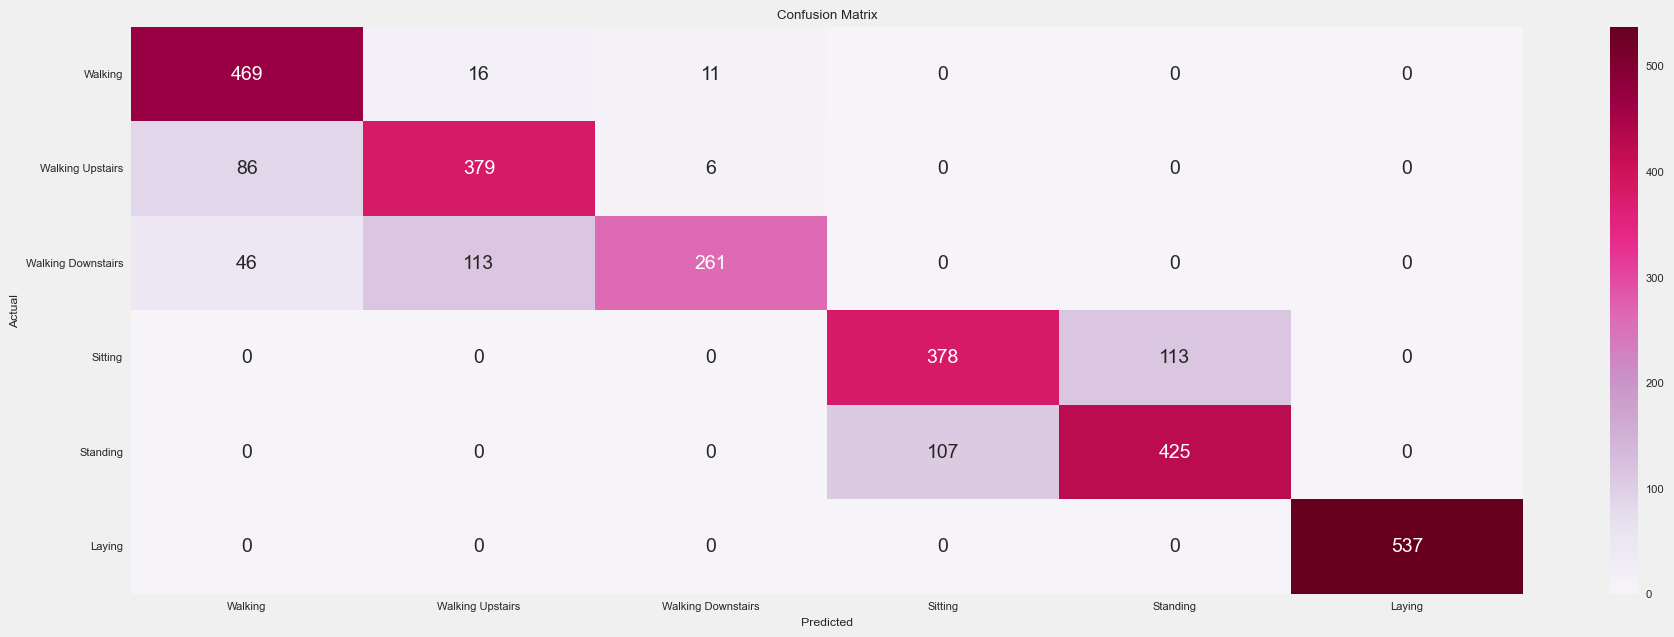

In [105]:
visualize_confusion_matrix (yhat_decision_tree)

# Вопросы

### Разница между показателями `precision` и `recall`. `F1`.

**Precision** (точность) - мера того, насколько точно модель предсказывает положительные классы. Важен, когда ложные срабатывания (False Positives) критичны. Например, в случае диагностики заболеваний, когда неверный диагноз может вызвать ненужное беспокойство.

    Формула: Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

TP (True Positives) — это количество правильных положительных предсказаний.
FP (False Positives) — это количество неверных положительных предсказаний.

**Recall** (полнота) - мера того, насколько полно модель находит все положительные классы. Важен, когда пропуск положительных случаев (False Negatives) является серьёзной проблемой. Например, в выявлении рака, когда пропуск может иметь серьёзные последствия.

    Формула: Recall = True Positives (TP)/ (True Positives (TP) + False Negatives (FN))

FN (False Negatives) — это количество пропущенных положительных предсказаний.

**F1 Score** — это гармоническое среднее между precision и recall. Он используется, когда нужно найти баланс между этими двумя показателями, особенно в ситуациях, когда данные несбалансированы. Используется, когда необходимо учитывать и точность, и полноту, и вы хотите избегать крайностей

    Формула: F1 Score = 2 × (Precision × Recall / (Precision + Recall))

### Гиперпараметры

Гиперпараметры модели машинного обучения (МО) — это параметры, которые задаются до начала обучения модели. В отличие от обычных параметров модели, которые оптимизируются в процессе обучения (например, веса нейронной сети), гиперпараметры не обновляются автоматически в процессе обучения. Вместо этого их нужно настраивать вручную или с помощью методов оптимизации.